<a href="https://colab.research.google.com/github/Akshay0145/FIFA20/blob/main/K_Means_Clustering__FIFA20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Categorizing similar players using their traits and their different skills in the field.



*   Author: Akshay Salve 
*   Team ID: 1085
* Project Code: 1004



#Import Basic Libraries

In [3]:
import pandas as pd
import numpy as np

#Import Data

In [4]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
data.shape

(14837, 104)

#Extracting Certain Columns

In [6]:
data.describe().columns #numeric veriable

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [7]:
data = data[['short_name', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [8]:
data.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [9]:
data = data[data.overall>87]
data

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,4,166500000.0,17.0,2023.0,7.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,1,143400000.0,1.0,2022.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,2,150200000.0,4.0,2023.0,4.0,77.0,60.0,70.0,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,4,92300000.0,10.0,2020.0,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,4,148900000.0,11.0,2023.0,10.0,93.0,86.0,81.0,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [10]:
pd.set_option('display.max_rows',70)
data.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          13
pace                           9
shooting                       9
passing                        9
dribbling                      9
defending                      9
physic                         9
gk_diving                     31
gk_handling                   31
gk_kicking                    31
gk_reflexes                   31
gk_speed                      31
gk_positioning                31
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

#Replacing null values with mean

In [11]:
data = data.fillna(data.mean())

In [12]:
data.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [13]:
names = data.short_name.to_list() #saving names for later

data = data.drop(['short_name'], axis=1) #drop the short_names column

In [14]:
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.185185,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.222222,85.555556,80.555556,89.111111,54.555556,86.888889,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.222222,85.555556,80.555556,89.111111,54.555556,86.888889,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.222222,85.555556,80.555556,89.111111,54.555556,86.888889,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,76.903226,76.935484,79.193548,82.870968,58.129032,74.516129,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.222222,85.555556,80.555556,89.111111,54.555556,86.888889,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


#Normalize (rescale) data

In [15]:
from sklearn import preprocessing

x = data.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scaled)


#Use PCA to reduce 60 columns into 2

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 20 PCA for the plot
reduce = pd.DataFrame(pca.fit_transform(x_norm))

#K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

#fit the input data
kmeans = kmeans.fit(reduce)

#get the cluster labels
labels = kmeans.predict(reduce)

#centroid values
centroid = kmeans.cluster_centers_

#cluster values
clusters = kmeans.labels_.tolist()

#Make a new data frame by adding players names and their cluster

In [18]:
reduce['cluster'] = clusters
reduce['name'] = names
reduce.columns = ['x','y','cluster','name']
reduce.head()

,x,y,cluster,name
0,-1.658145,-1.189985,0,L. Messi
1,-1.306317,-0.696545,0,Cristiano Ronaldo
2,-1.484600,-1.355175,0,Neymar Jr
3,2.860006,-0.700302,1,J. Oblak
4,-1.334722,-1.099146,0,E. Hazard


#Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


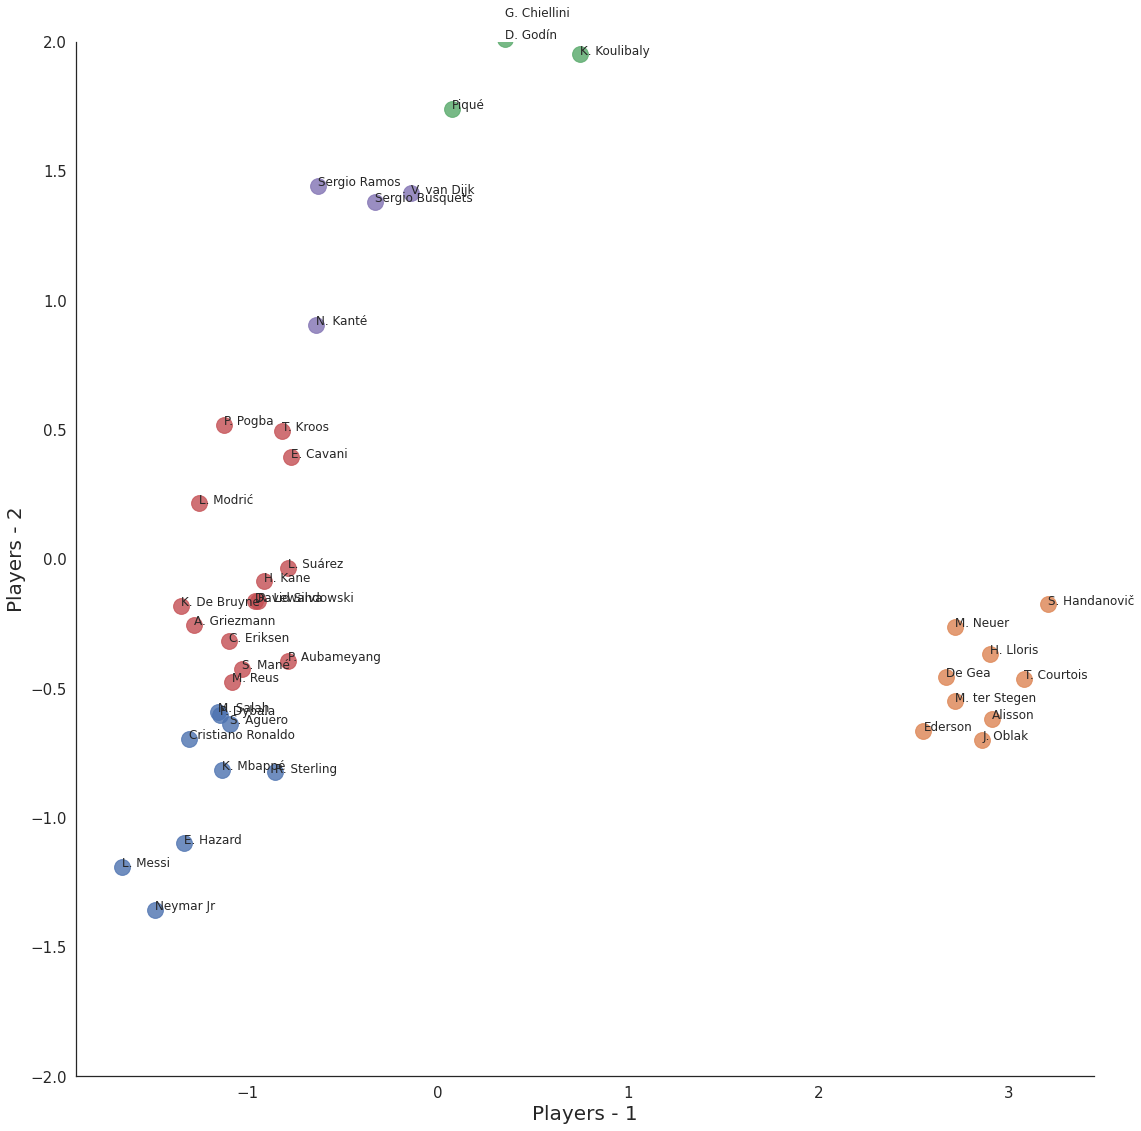

In [20]:

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduce, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduce.x, reduce.y, reduce.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Players - 1", fontsize = 20)
plt.ylabel("Players - 2", fontsize = 20)

plt.show()